In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../src/')

In [38]:
import numpy as np
from modelling import ols,ridge
from modelling.sgd import SGD_optimizer
from model_evaluation.param_analysis import evaluate_parameter
from data.create_dataset import *
from visualization.visualize import *
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
import pandas as pd

In [3]:
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=4)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
Xscaler = StandardScaler().fit(X_train)
zscaler = StandardScaler().fit(z_train)

#X_train_scl = Xscaler.transform(X_train)
#z_train_scl = zscaler.transform(z_train)
X_train_scl = X_train - np.mean(X_train,axis=0)
z_train_scl = z_train - np.mean(z_train,axis=0)

In [13]:
lmbs = np.logspace(-6, 0, 10)
sgd = SGD_optimizer(fit_intercept = False, batch_size = 100, n_epochs = 1000,use_momentum= True, gamma = 0.5,regularization = 'l2', lmb = 0.001, lr=0.01)
mse_train, mse_test, r2_train,r2_test = evaluate_parameter(X_train,z_train, X_test, z_test, 'lr', lmbs, sgd)

1e-06
4.641588833612782e-06
2.1544346900318823e-05
0.0001
0.00046415888336127773
0.002154434690031882
0.01
0.046415888336127725
0.21544346900318823
1.0


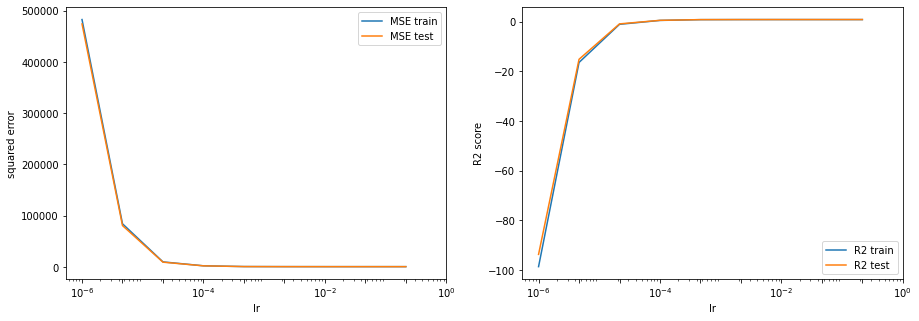

In [24]:
plot_train_test_mse_r2(mse_train, mse_test, r2_train,r2_test,lmbs,'lr')

In [23]:
lmbs = np.logspace(-6, 0, 10)
sgd = SGD_optimizer(fit_intercept = False, batch_size = 100, n_epochs = 10000,use_momentum= True, gamma = 0.5,regularization = 'l2', lmb = 0.001, lr=0.01)
mse_train2, mse_test2, r2_train2,r2_test2 = evaluate_parameter(X_train,z_train, X_test, z_test, 'lr', lmbs, sgd)

1e-06
4.641588833612782e-06
2.1544346900318823e-05
0.0001
0.00046415888336127773
0.002154434690031882
0.01
0.046415888336127725
0.21544346900318823
1.0


../src/modelling/sgd.py:267: RuntimeWarning: overflow encountered in matmul
  self.mse = MSE(z,z_tilde)
../src/modelling/sgd.py:230: RuntimeWarning: invalid value encountered in matmul
  def sgd_step(self,X,z):


[autoreload of visualization.visualize failed: Traceback (most recent call last):
  File "/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", li

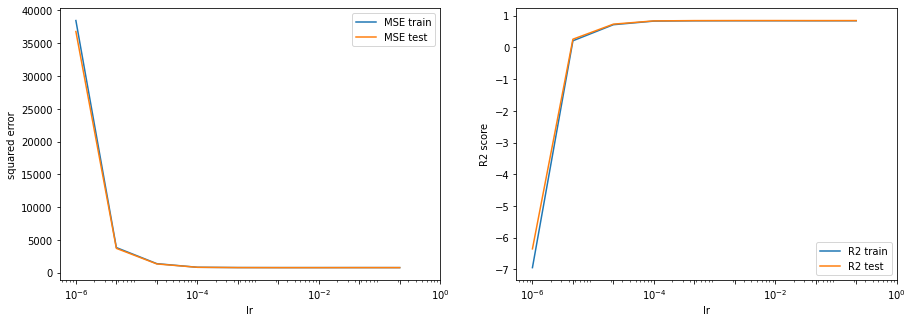

In [36]:
plot_train_test_mse_r2(mse_train2, mse_test2, r2_train2,r2_test2,lmbs,'lr')

1


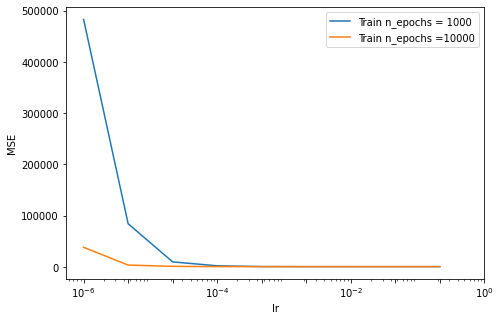

In [55]:
plots = {'Train n_epochs = 1000':mse_train,'Train n_epochs =10000':mse_train2}
plots = [(plots,('lr','MSE'))]
plot_plots(plots,lmbs)

From the plot it is clear that with more epochs, one can have lower learning rate and still converge. The reason for high MSE with lower learning rate is simply that the optimizer hasn't had the time to come any closer to the optimal solution.

1


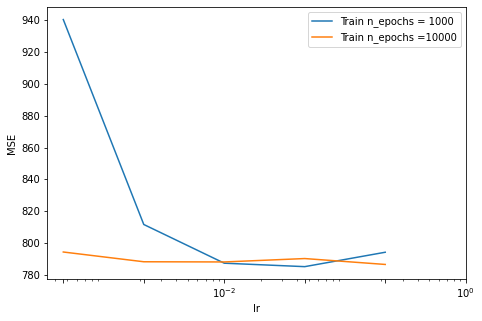

In [57]:
plots = {'Train n_epochs = 1000':mse_train[4:],'Train n_epochs =10000':mse_train2[4:]}
plots = [(plots,('lr','MSE'))]
plot_plots(plots,lmbs[4:])

Bigger learning rate is obviously giving issues for some reason. Aparently overflow, it's either memory leak somehow or simply that batch size must be reduced if this rate is to be used.

In [ ]:
lmbs = np.logspace(-6, 0, 10)
sgd = SGD_optimizer(fit_intercept = False, batch_size = 10, n_epochs = 10000,use_momentum= True, gamma = 0.5,regularization = 'l2', lmb = 0.001, lr=0.01)
mse_train2, mse_test2, r2_train2,r2_test2 = evaluate_parameter(X_train,z_train, X_test, z_test, 'lr', lmbs, sgd)

1e-06
4.641588833612782e-06
2.1544346900318823e-05
0.0001
0.00046415888336127773
0.002154434690031882


In [65]:
from sklearn.model_selection import GridSearchCV
nlambdas = 10
lambdas = np.logspace(-4, 2, nlambdas)
# create and fit a ridge regression model, testing each alpha
model = SGD_optimizer(fit_intercept = False, batch_size = 10, n_epochs = 100,use_momentum= True, gamma = 0.5,regularization = 'l2', lmb = 0.001, lr=0.01)
gridsearch = GridSearchCV(estimator=model, param_grid=dict(lr=lambdas),scoring='neg_mean_squared_error',n_jobs=-1)
gridsearch.fit(X,z)

../src/modelling/sgd.py:230: RuntimeWarning: overflow encountered in matmul
  pred = X @ self.beta + self.intercept
../src/modelling/sgd.py:267: RuntimeWarning: overflow encountered in matmul
  return (2/X.shape[0])*(X.T @ update) + 2*self.lmb*self.beta
../src/modelling/sgd.py:253: RuntimeWarning: invalid value encountered in add
  self.vt = self.gamma*self.vt + self.lr*self.cost_grad(X,update)
/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_ca

../src/modelling/sgd.py:230: RuntimeWarning: overflow encountered in matmul
  pred = X @ self.beta + self.intercept
../src/modelling/sgd.py:267: RuntimeWarning: overflow encountered in matmul
  return (2/X.shape[0])*(X.T @ update) + 2*self.lmb*self.beta
../src/modelling/sgd.py:253: RuntimeWarning: invalid value encountered in add
  self.vt = self.gamma*self.vt + self.lr*self.cost_grad(X,update)
/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_ca

../src/modelling/sgd.py:253: RuntimeWarning: overflow encountered in multiply
  self.vt = self.gamma*self.vt + self.lr*self.cost_grad(X,update)
../src/modelling/sgd.py:230: RuntimeWarning: overflow encountered in matmul
  pred = X @ self.beta + self.intercept
../src/modelling/sgd.py:253: RuntimeWarning: invalid value encountered in add
  self.vt = self.gamma*self.vt + self.lr*self.cost_grad(X,update)
../src/modelling/sgd.py:230: RuntimeWarning: invalid value encountered in matmul
  pred = X @ self.beta + self.intercept
/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/oliverif/.pyenv/v

/home/oliverif/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [-5040.6505128  -1946.55603326 -1213.73282044 -1247.46008367
 -1285.35944053 -1294.82699907            nan            nan
            nan            nan]
  warnings.warn(


0.002154434690031882


GridSearchCV(estimator=<modelling.sgd.SGD_optimizer object at 0x7fa4a6065fd0>,
             n_jobs=-1,
             param_grid={'lr': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [66]:
print(gridsearch.cv_results_)

{'mean_fit_time': array([4.31223474, 4.29945426, 5.07360349, 4.08150063, 4.05658064,
       5.92626634, 4.46419821, 6.10618062, 5.87624364, 4.07774549]), 'std_fit_time': array([1.20548646, 1.19240187, 1.39645588, 1.02505821, 0.54956801,
       1.1597832 , 1.16278848, 1.39000522, 0.71292561, 0.57248872]), 'mean_score_time': array([0.00046964, 0.00054264, 0.00191712, 0.00048203, 0.00051808,
       0.00057383, 0.00074573, 0.00081   , 0.00363789, 0.00061593]), 'std_score_time': array([1.76387215e-05, 1.48815598e-04, 1.95978919e-03, 1.69839730e-05,
       2.88539677e-05, 5.75501955e-05, 1.09563379e-04, 3.19657085e-04,
       3.76173438e-03, 1.05024139e-04]), 'param_lr': masked_array(data=[0.0001, 0.00046415888336127773, 0.002154434690031882,
                   0.01, 0.046415888336127774, 0.21544346900318823, 1.0,
                   4.641588833612772, 21.54434690031882, 100.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
      

In [ ]:
a = [1,2,3]
c = [2,3]
dict(b=a,d=c)

In [ ]:
model.get_params()

In [96]:
sgd = SGD_optimizer(fit_intercept = False, batch_size = 8000, n_epochs = 100,use_momentum= True, gamma = 0.5,regularization = 'l2', lmb = 0.001, lr=0.5)
sgd.fit(X_train,z_train)

0.5


array([[1216.84212516],
       [ 123.21461441],
       [  42.86559654],
       [  15.43640921],
       [ -25.13349501],
       [ -51.34595806],
       [ -18.87705837],
       [  54.1500187 ],
       [  26.93664781],
       [ -43.65800358],
       [ -40.86145853],
       [  80.15137529],
       [  97.74276081],
       [  65.83784466],
       [ -23.91360763]])

In [81]:
sgd.score(X_train,z_train)
sgd.mse

1180.7661944611175

In [75]:
from model_evaluation.metrics import MSE, R2
from modelling.common import predict
type(float(R2(z,predict(X,sgd.beta))))

float

numpy.ndarray

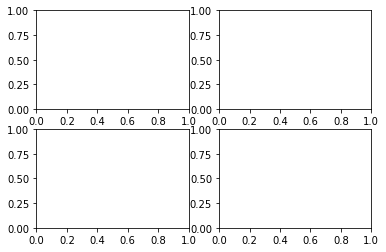

In [48]:
fig, ax = plt.subplots(2,2)
type(ax)